In [25]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.serif'] = ['Times']

In [26]:
os.chdir(r'C:/Develop/offlineRL-with-diffusion') 

In [27]:
colorset1 = ["darkorange", "mediumpurple", "darkcyan"]
colorset2 = ["royalblue", "darksalmon", "darkgreen"]

In [28]:
# resfolder = f"statistics/{env}/{dataset}_{args.percentage}"
# np.savez(f"{resfolder}/batch{args.batch_id}.npz", 
#             dynamic_mse=dynamic_mse, 
#             reward_mse=reward_mse, 
#             real_rewards=real_rewards,
#             gen_rewards=gen_rewards,
#             config = config)

In [31]:
def get_data(env_name, data_type):
    # path = f"statistics/{env_name}-v2/{env_name}-v2_0.0"
    # path = f'statistics/<OrderEnforcing<ExtendedHalfCheetahEnv<HalfCheetahExt-v2>>>/medium_1.0'
    path = f"plot/statistics/{env_name}-v2/{data_type}"
    
    dynamic_mse = []
    reward_mse = []
    real_rewards = []
    gen_rewards = []
    
    for f in os.listdir(path):
        if f.endswith(".npz"):
            data = np.load(os.path.join(path, f), allow_pickle=True)
            dynamic_mse.append(data["dynamic_mse"])
            reward_mse.append(data["reward_mse"])
            real_rewards.append(data["real_rewards"])
            gen_rewards.append(data["gen_rewards"])
    dynamic_mse = np.concatenate(dynamic_mse)
    reward_mse = np.concatenate(reward_mse)
    real_rewards = np.concatenate(real_rewards)
    gen_rewards = np.concatenate(gen_rewards)
    
    return dynamic_mse, reward_mse, real_rewards, gen_rewards

In [32]:
# dynamic_mse, reward_mse, real_rewards, gen_rewards = get_data(1, 'ours')

In [33]:
# print(dynamic_mse.shape)
# print(dynamic_mse)

In [34]:
# print(reward_mse.shape)
# print(reward_mse)

In [35]:
env_names = ["halfcheetah-medium",
            #  "halfcheetah-medium-replay",
            #  "halfcheetah-medium-expert",
            #  "hopper-medium",
            #  "hopper-medium-replay",
            #  "hopper-medium-expert",
            #  "walker2d-medium",
            #  "walker2d-medium-replay",
            #  "walker2d-medium-expert",
            ]

data_types = [
            #   "original",
              "augmented",
              "filtered",
              ]

res = {}
for env_name in env_names:
    dataset = np.load(f"transformer/data/original/{env_name}-v2.pkl", allow_pickle=True)
    
    trajectory_rewards = []
    single_rewards = []
    for epi in dataset:
        for idx in range(len(epi["observations"])-31+1):
            trajectory_rewards.append(epi["rewards"][idx:idx+31].sum())
        single_rewards.append(epi["rewards"])
    res[f"{env_name}_original"] = np.array(trajectory_rewards)
        
    # res = {}
    for data_type in data_types:
        dynamic_mse, reward_mse, real_rewards, gen_rewards = get_data(env_name, data_type)
        # until here same, but preprocessing details required
        real = real_rewards.reshape(-1, 31).sum(axis=1)
        res[f"{env_name}_{data_type}"] = real

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Develop\\offlineRL-with-diffusion\\figures\\reward_histogram.png'

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


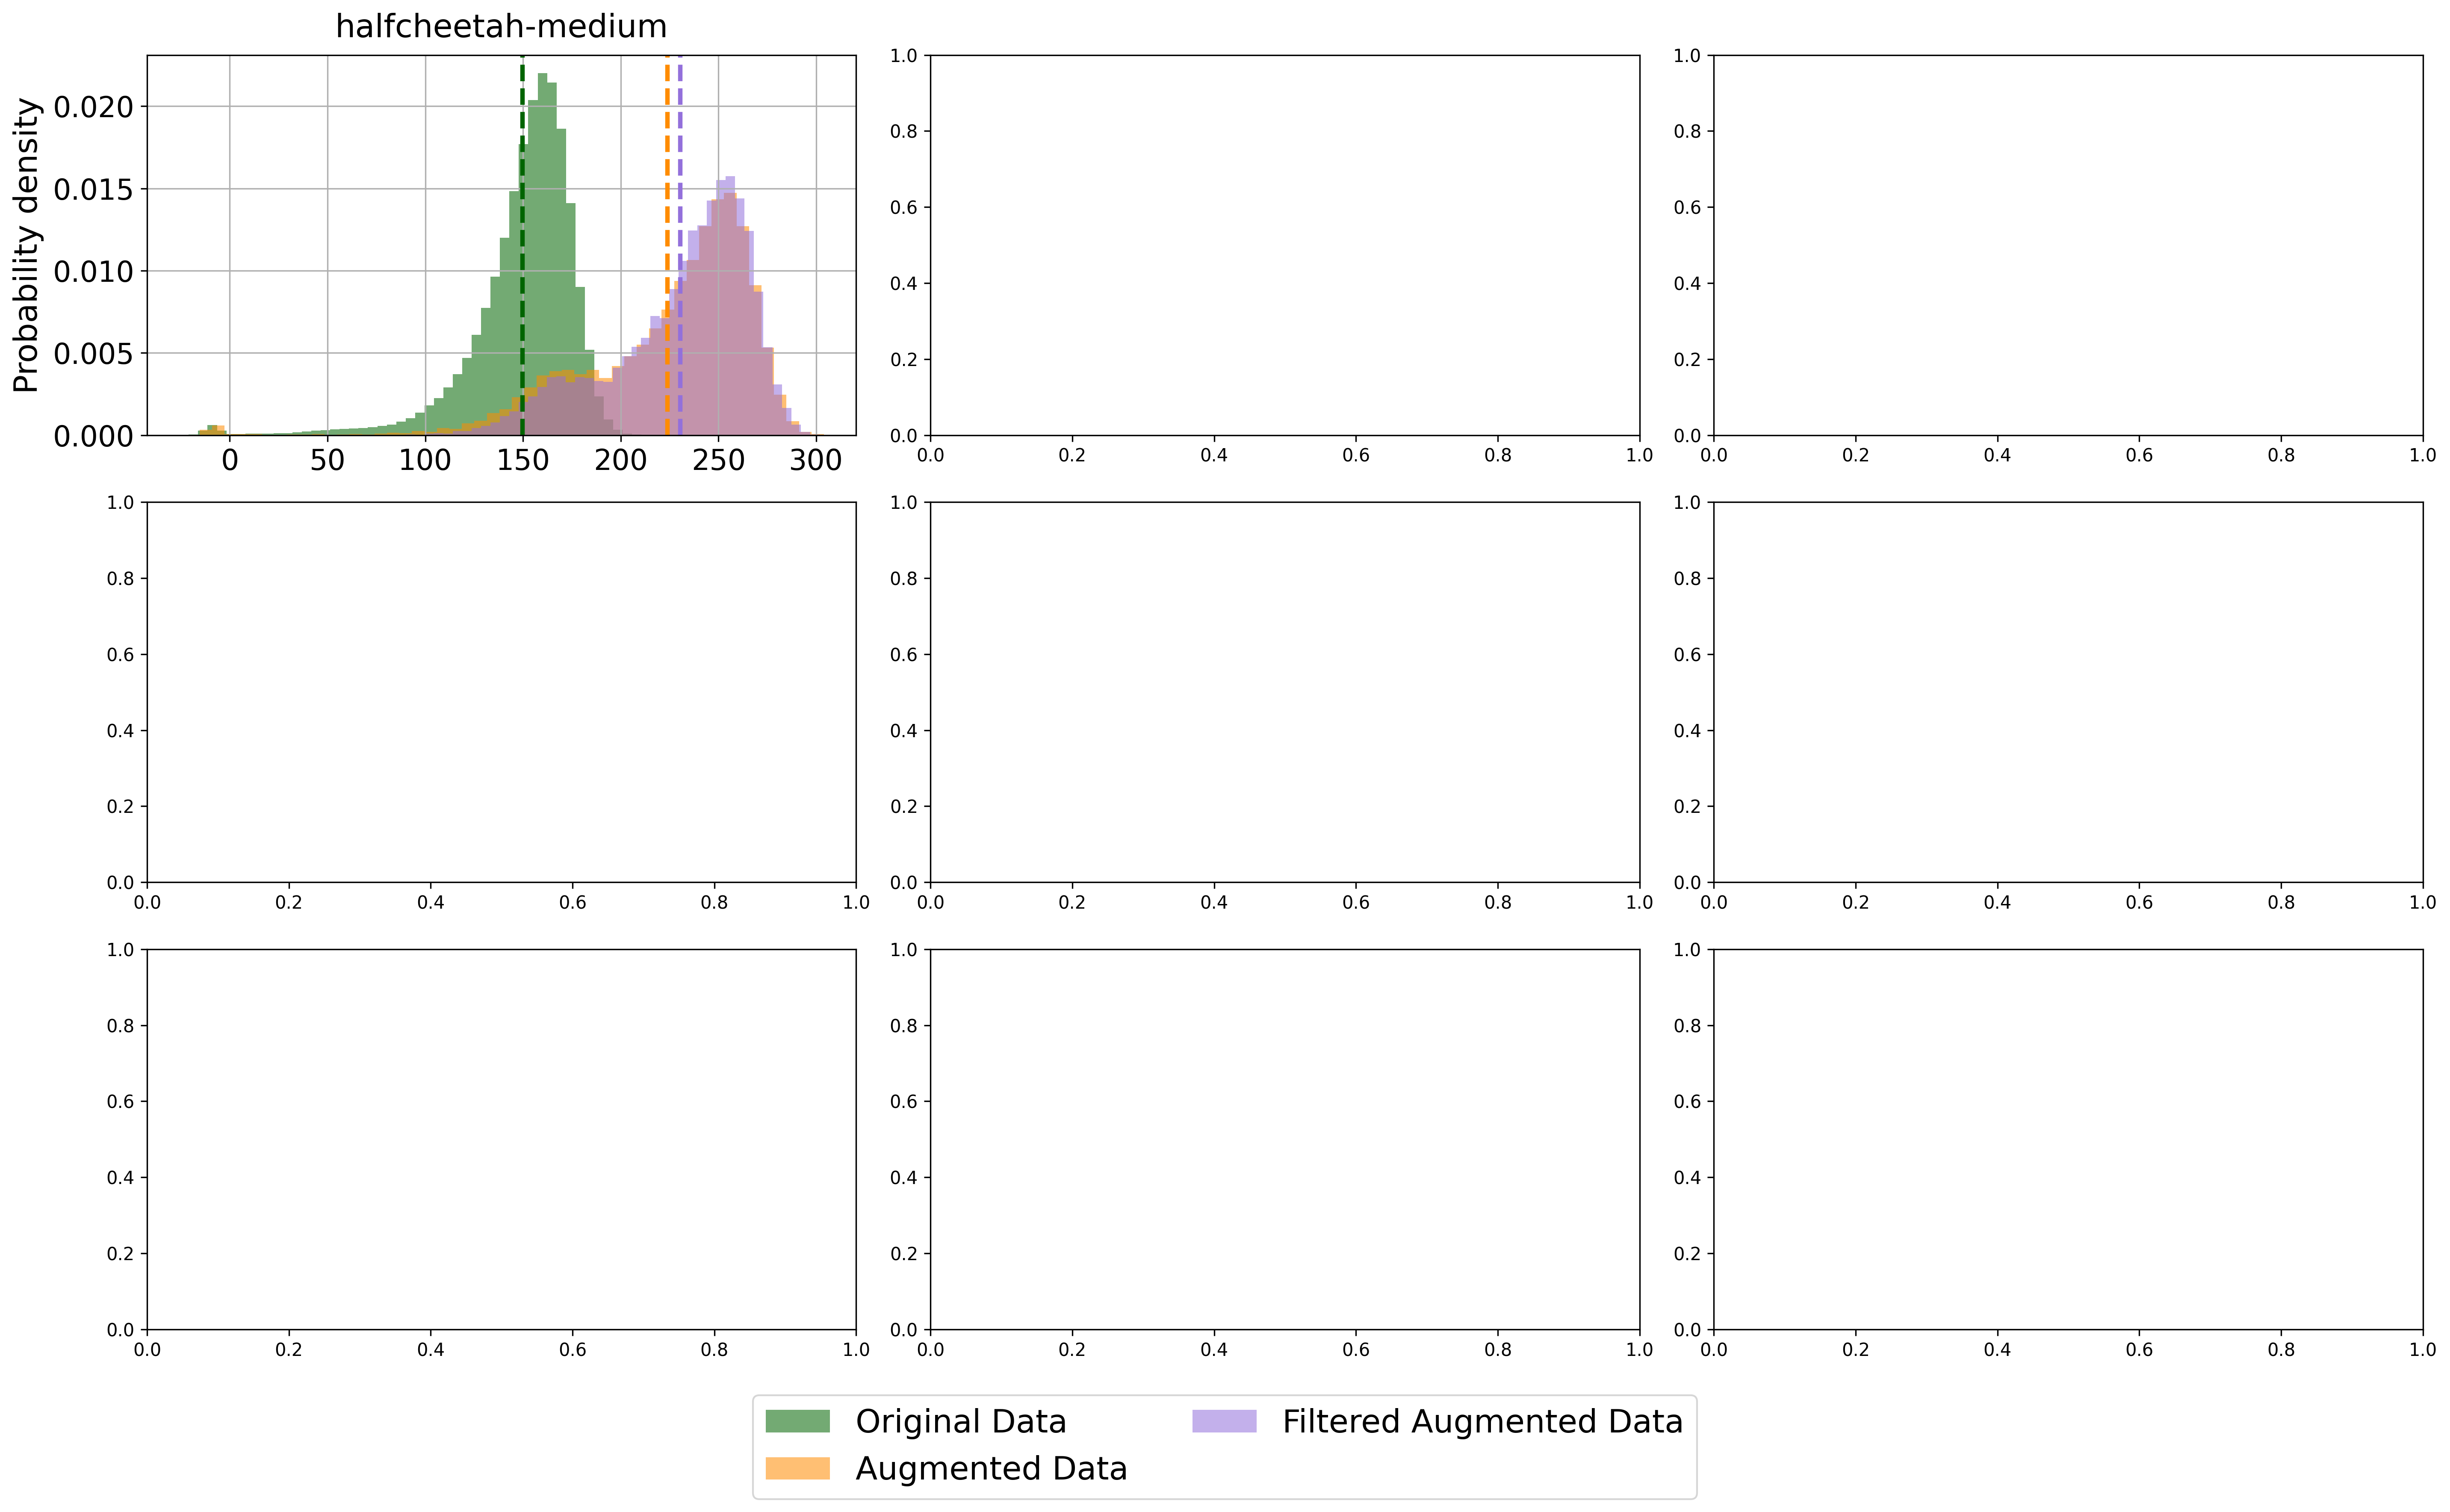

In [36]:
num_bins = 50
# labels = ["Offline Data", "Amplified conditioned"]
labels = ["Original Data", "Augmented Data", "Filtered Augmented Data"]
data_types = ["original", "augmented", "filtered"]
colors = ["darkgreen", "darkorange", "mediumpurple"]

fig, ax = plt.subplots(3, 3, figsize=(19.2, 10.8), dpi=300)
# fig, ax = plt.subplots(1, 1, figsize=(19.2, 10.8), dpi=300)
for i, target_env_name in enumerate(env_names):
    # print(f"Env Name: {target_env_name}")
    # fig, ax = plt.subplots(figsize=(6,3.5), dpi=300)
    k_list, bins_list, patches_list = [], [], []
    for data_type, label, color in zip(data_types, labels, colors):
        if i == 0:
            k, bins, patches = ax[i//3, i%3].hist(res[f"{target_env_name}_{data_type}"], num_bins, density=True, color=color, alpha=0.55, label=label)
        else:
            k, bins, patches = ax[i//3, i%3].hist(res[f"{target_env_name}_{data_type}"], num_bins, density=True, color=color, alpha=0.55)
        ax[i//3, i%3].axvline(x=res[f"{target_env_name}_{data_type}"].mean(), color=color, linestyle='--', linewidth=2.5)
        k_list.append(k)
        bins_list.append(bins)
        patches_list.append(patches)
    if i // 3 == 2:
        ax[i//3, i%3].set_xlabel('Oracle rewards sum of subtrajectory', fontsize=18)
    if i % 3 == 0:
        ax[i//3, i%3].set_ylabel('Probability density', fontsize=18, labelpad=5)

    # legend_labels = ["Amplified conditioned", "Fixed conditioned", "Unconditioned", "Offline data"]
    legend_labels = labels
    handles = patches_list

    # ax.legend(handles, legend_labels, prop={'size':14})
    # if i == 0:
    #     ax[i//3, i%3].legend(handles, legend_labels, prop={'size':18}, loc="upper left")
    ax[i//3, i%3].grid() 
    ax[i//3, i%3].tick_params(axis="both", labelsize=16)
    ax[i//3, i%3].set_title(target_env_name, pad=10, fontsize=18)
    
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.0), prop={'size':18}, fancybox=True, ncol=2)
plt.tight_layout()
plt.savefig(f"plot/figures/reward_histogram.png", bbox_inches="tight")
plt.show()
plt.close()